In [367]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [368]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header = None)

In [369]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [370]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,8.74,6.41,-6.36,-4.51,2.04,8.74,3.30,8.01,7.82,-1.89,3.25,2.18,1.26,8.35,3.35,-2.14,-7.91,-6.46,-3.40,5.58,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45

In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [372]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,11.138871,24.391353,3.574837,28.961007,33.527997,15.441830,6.800023,12.254077,2.666040,2.871444,3.707061,23.583502,19.385585,2.985604,3.860829,21.227257,2.710417,34.431138,34.981454,26.716959,27.592106,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,30.228748,43.203129,13.297459,45.963717,48.491904,34.898486,22.647173,30.816086,10.249607,5.536660,4.665525,43.083293,39.694600,5.137076,11.400187,40.412118,10.686816,48.686424,50.006305,44.614306,44.886247,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.9500

In [373]:
pd.options.display.max_columns = None
display(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,8.74,6.41,-6.36,-4.51,2.04,8.74,3.30,8.01,7.82,-1.89,3.25,2.18,1.26,8.35,3.35,-2.14,-7.91,-6.46,-3.40,5.58,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45

In [374]:
data.drop(0 , axis = 1, inplace = True)

In [375]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [376]:
data1 = data.replace(99, np.nan)

In [377]:
display(data1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,7.52,9.27,9.27,NaN,9.27,NaN,6.17,7.33,9.08,7.28,NaN,NaN,7.28,7.33,NaN,7.23,NaN,NaN,NaN,9.27,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,NaN,1.55,NaN,NaN,NaN,6.84,6.84,-3.98,6.99,3.45,NaN,6.94,1.55,7.67,NaN,6.55,NaN,NaN,NaN,NaN,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,8.74,6.41,-6.36,-4.51,2.04,8.74,3.30,8.01,7.82,-1.89,3.25,2.18,1.26,8.35,3.35,-2.14,-7.91,-6.46,-3.40,5.58,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,9.13,8.64,8.93,8.74,2.77,8.93,-9.03,8.06,7.77,7.48,8.20

In [378]:
#### Find the best and worst rated joke. Therefore, find the highest and lowest mean of each column. Then get ID for these
#means: 
joke_means = data1.mean(axis = 0)
joke_means

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [379]:
type(joke_means)

pandas.core.series.Series

In [380]:
best_joke = max(joke_means)
best_joke

3.6650848950824937

In [381]:
worst_joke = min(joke_means)
worst_joke

-3.8338796373689923

In [382]:
best_joke_id = joke_means.idxmax()
best_joke_id

50

In [383]:
worst_joke_id = joke_means.idxmin()
worst_joke_id

58

In [384]:
arr = data1.values
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [385]:
data1 = data1.to_numpy()

In [386]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(new_data))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])


In [387]:
new_arr, idx = replace(data1, 0.1)

In [388]:
new_arr


array([[-7.82,  8.79, 99.  , ...,   nan,   nan,   nan],
       [ 4.08, -0.29, 99.  , ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [389]:

data1[idx[0][0], idx[1][0]]

0.97

In [390]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [391]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [392]:
latent_item_features

array([[0.156, 0.233],
       [0.024, 0.819],
       [0.292, 0.314],
       [0.828, 0.429],
       [0.777, 0.277],
       [0.466, 0.858],
       [0.778, 1.   ],
       [0.046, 0.266],
       [0.486, 0.754],
       [0.155, 0.278],
       [0.827, 0.513],
       [0.426, 0.697],
       [0.097, 0.661],
       [0.626, 0.744],
       [0.181, 0.768],
       [0.336, 0.415],
       [0.11 , 0.563],
       [0.407, 0.494],
       [0.592, 0.983],
       [0.581, 0.131],
       [0.811, 0.752],
       [0.786, 0.445],
       [0.469, 0.416],
       [0.637, 0.912],
       [0.46 , 0.241],
       [0.808, 0.557],
       [0.608, 0.974],
       [0.85 , 0.06 ],
       [0.385, 0.422],
       [0.418, 0.986],
       [0.866, 0.71 ],
       [0.108, 0.178],
       [0.465, 0.373],
       [0.541, 0.509],
       [0.589, 0.446],
       [0.682, 0.155],
       [0.7  , 0.488],
       [0.762, 0.351],
       [0.058, 0.183],
       [0.281, 0.77 ],
       [0.483, 0.27 ],
       [0.369, 0.644],
       [0.63 , 0.507],
       [0.9

In [393]:
latent_user_preferences 

array([[0.514, 0.66 ],
       [0.877, 0.31 ],
       [0.157, 0.941],
       ...,
       [0.204, 0.412],
       [0.712, 0.372],
       [0.493, 0.173]])

In [394]:

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.234, 0.553, 0.357, ..., 0.368, 0.52 , 0.109],
       [0.209, 0.275, 0.354, ..., 0.267, 0.795, 0.083],
       [0.244, 0.775, 0.341, ..., 0.439, 0.243, 0.126],
       ...,
       [0.128, 0.343, 0.189, ..., 0.212, 0.223, 0.062],
       [0.198, 0.322, 0.325, ..., 0.27 , 0.658, 0.083],
       [0.117, 0.154, 0.198, ..., 0.15 , 0.446, 0.047]])

In [395]:
def predict_rating(user_id, item_id):

    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating!=99):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

IndentationError: unexpected indent (<ipython-input-395-e3d1ce8faef0>, line 35)

Iteration 0/10:	MSE=788.324510


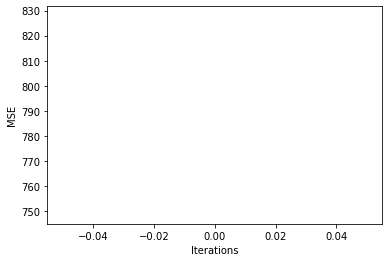

In [396]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [400]:

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[ 1.439e+01,  1.854e+00,  1.058e+01, ...,  1.028e+02,  1.036e+02,
         1.020e+02],
       [ 3.983e+00,  4.100e+00,  4.198e+00, ..., -3.367e-01, -4.638e-01,
        -7.054e-02],
       [ 1.053e+02,  9.421e+01,  1.060e+02, ...,  1.052e+02,  1.033e+02,
         1.103e+02],
       ...,
       [ 1.151e+02,  1.054e+02,  1.167e+02, ...,  9.528e+01,  9.286e+01,
         1.012e+02],
       [ 1.172e+02,  1.075e+02,  1.189e+02, ...,  9.519e+01,  9.272e+01,
         1.012e+02],
       [ 2.505e+01,  1.320e+01,  2.195e+01, ...,  9.896e+01,  9.937e+01,
         9.890e+01]])

In [401]:

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [402]:

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [403]:
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 14.390188464819)","(8.79, 1.8538642162674186)","(-9.66, 10.5822659671028)","(-8.16, 19.76733339087479)","(-7.52, -0.031532853680258856)","(-8.5, -6.584771366724283)","(-9.85, -0.750978747822207)","(4.17, -0.8906495991368467)","(-8.98, 19.23970505199022)","(-4.76, -7.21100012550806)","(-8.5, -5.081829612140264)","(-6.75, -7.078830160884784)","(-7.18, -2.033703004791925)","(8.45, -7.271008969468459)","(-7.18, -1.9291350370276144)","(-7.52, -3.337335668220239)","(-7.43, -1.2828427780365388)","(-9.81, -1.0045374332553616)","(-9.85, -0.17570128808061253)","(-9.85, -1.1097517980291138)","(-9.37, 1.6053867982566525)","(1.5, -8.864367651441187)","(-4.37, -8.140273135698566)","(-9.81, 21.45289156733224)","(-8.5, -10.427106846343612)","(1.12, -2.4725861462822074)","(7.82, 2.640202487051514)","(2.86, -0.9603170730165086)","(9.13, 2.4249262107030125)","(-7.43, 1.5996605318284183)","(2.14, 1.0320482444990289)","(-4.08, 2.658842422642369)","(-9.08, 12.656128418786748)","(7.82, -7.657100008633849)","(5.05, 2.368079487230341)","(4.95, 2.7540605732759977)","(-9.17, 17.19507350140428)","(-8.4, -5.4454292821240715)","(-8.4, -6.824905884352058)","(-8.4, -7.029282713643896)","(-8.11, -1.004742962413062)","(-9.13, 0.17172345357103455)","(-9.03, 8.720352395640662)","(-9.08, 24.41892094440708)","(-7.14, -10.295554125857167)","(-6.26, -4.293276860501679)","(3.79, -8.071477778670054)","(-0.1, 0.20894447996254828)","(3.93, 2.1628983290593977)","(4.13, 2.9753882621383094)","(-8.69, -3.6765029950505426)","(-7.14, -11.345187643740275)","(3.2, 2.3208269743964496)","(8.3, 1.45883317852107)","(-4.56, -8.338541822191338)","(0.92, 0.4329162168554728)","(-9.13, 28.455332001125)","(-9.42, 31.704352111003775)","(2.82, 0.005972017219770171)","(-8.64, 3.0192691444058894)","(8.59, 1.093253316247756)","(3.59, 2.2090893964375433)","(-6.84, -11.928335008529784)","(-9.03, 7.804250733382357)","(2.82, 0.9950931735109316)","(-1.36, 1.8359648350935018)","(-9.08, 3.881764949047825)","(8.3, 1.9443413906729228)","(5.68, 1.6741037536253869)","(-4.81, -14.645935713754923)","(99.0, 101.3536875568409)","(99.0, 101.28147114372965)","(99.0, 100.26431029178006)","(99.0, 97.64453056507398)","(99.0, 95.86225089598283)","(99.0, 93.65087151682289)","(99.0, 92.37845226074262)","(-9.42, 91.29960030594191)","(99.0, 89.43103815912711)","(99.0, 88.32338352716265)","(99.0, 87.16582681340716)","(-7.72, 86.7039798119058)","(99.0, 86.09541716501695)","(99.0, 85.99043886989075)","(99.0, 86.86316835237228)","(99.0, 86.86607175153489)","(99.0, 87.9885409554801)","(99.0, 88.67439416077278)","(99.0, 89.97542147330591)","(99.0, 91.68870177680766)","(2.82, 93.09261098261521)","(99.0, 94.5263588750219)","(99.0, 95.87143639211057)","(99.0, 98.22181695541528)","(99.0, 100.32249059631035)","(99.0, 101.98513053416153)","(-5.63, 103.06541827099772)","(99.0, 102.82777193984589)","(99.0, 103.61400847217509)","(99.0, 102.00070632076411)"
1,"(4.08, 3.9828308667569865)","(-0.29, 4.099682411220468)","(6.36, 4.197845218040555)","(4.37, 3.9351219037453706)","(-2.38, 0.03121966105461573)","(-9.66, 3.357507853483584)","(-0.73, 0.01744506687998086)","(-5.34, 0.00013148875414575352)","(8.88, 3.9500112588323737)","(9.22, 3.5382589333308316)","(6.75, 2.476886607383293)","(8.64, 2.2666057294504682)","(4.42, 0.011318951248493154)","(7.43, 2.210237536583187)","(4.56, 0.0055781515658109085)","(-0.97, 0.02489530079954093)","(4.66, 0.007437354195591247)","(-0.68, 0.01763708442277825)","(3.3, 0.018512282411706476)","(-1.21, 0.00701449136976452)","(0.87, 0.0408334344140256)","(8.64, 3.0430879150622294)","(8.35, 3.7963719944382612)","(9.17, 3.7166745985292)","(0.05, 3.5002321123952154)","(7.57, 1.0307089931435938)","(4.71, 0.058977161